# Bank Marketing Prediction

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
plt.rcParams["figure.figsize"]= (12, 7)
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline


## Loading The Datset

In [5]:
df = pd.read_csv('bank-full.csv', sep = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.shape

(45211, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [10]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

Fortunatly there are no any explicit missing values for any variable.

In [11]:
print(df.head())

   age           job  salary  marital  education targeted default  balance  \
0   58    management  100000  married   tertiary      yes      no     2143   
1   44    technician   60000   single  secondary      yes      no       29   
2   33  entrepreneur  120000  married  secondary      yes      no        2   
3   47   blue-collar   20000  married    unknown       no      no     1506   
4   33       unknown       0   single    unknown       no      no        1   

  housing loan  contact  day month  duration  campaign  pdays  previous  \
0     yes   no  unknown    5   may       261         1     -1         0   
1     yes   no  unknown    5   may       151         1     -1         0   
2     yes  yes  unknown    5   may        76         1     -1         0   
3     yes   no  unknown    5   may        92         1     -1         0   
4      no   no  unknown    5   may       198         1     -1         0   

  poutcome response  
0  unknown       no  
1  unknown       no  
2  unknown    

**There are many 'unknown' values under Categorical variables.We have to treat them!!!**

In [13]:
# Target variable distribution
count = df.groupby('response').size()
percent = count/len(df)*100
print(percent)

response
no     88.30152
yes    11.69848
dtype: float64


**From the distribution of Target variable: "response" it is found that data is imbalanced becouse there is approx 88% is 'no' and 12% is 'yes'.**

## Analysis of Indepedent Numerical Variables
Note:
### I have did analysis of each individual variable and checking if there is any outlier values present.

### Outliers can be defined as values out of range [(Q1-1.5IQR) , (Q3+1.5IQR)] but here I choose a range based on Maximum and

### Minimum value for each variable selected by observing Boxplot of corresponding variable.

### After identify, Outlier values will be imputed by "mean" of respective variable by implementation of following "impute_outliers" function.¶

In [14]:
# Impute outliers function
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [15]:
#lets see statistic of Numerical variables before Outlier treatment
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


From the above result one can see that some variables ('salary', 'duration', 'campaign', 'pdays', 'previous') has outliers. That can also visualize through graph further.

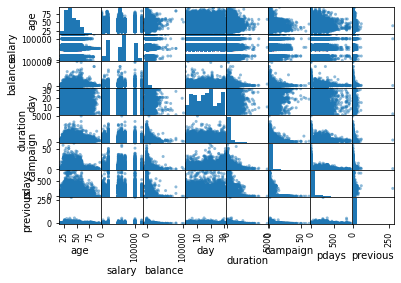

In [23]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

Scatter plot matrix showing that there is no strong relationship between these indepedent variables (no multicollinearity among these).

Lets analyze all Independent Numerical variables against Target variable 'response' by plotting Boxplot. We can easily find outliers through Boxplot.

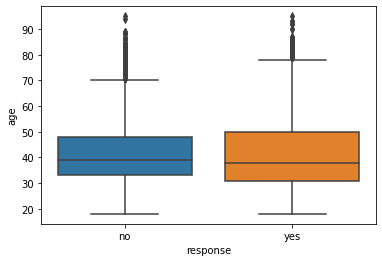

In [26]:
# age
sns.boxplot(x='response', y='age', data=df)

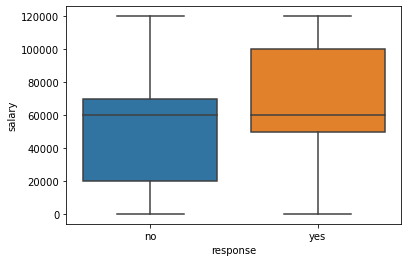

In [27]:
#salary

sns.boxplot(x='response', y='salary', data=df)

In [28]:
# Fixing balance column
dataset_new = df
min_val = dataset_new["balance"].min()
max_val = 20000
dataset_new = impute_outliers(df=dataset_new, column='balance' , minimum=min_val, maximum=max_val)

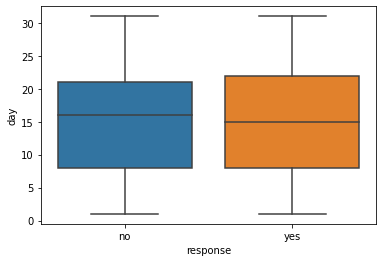

In [29]:
#day

sns.boxplot(x='response', y='day', data=df)

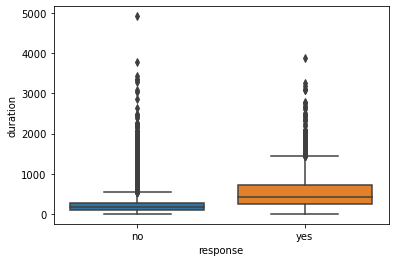

In [30]:
#duration

sns.boxplot(x='response', y='duration', data=df)

In [31]:
# Fixing duration column
min_val = dataset_new["duration"].min()
max_val = 2000
dataset_new = impute_outliers(df=dataset_new, column='duration' , minimum=min_val, maximum=max_val)

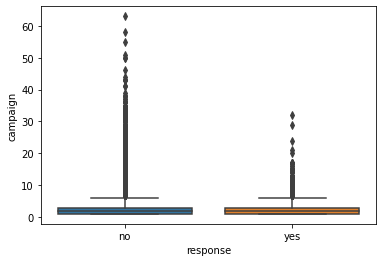

In [32]:
#campaign

sns.boxplot(x='response', y='campaign', data=df)

In [33]:
# Fixing campaign column
min_val = dataset_new["campaign"].min()
max_val = 20
dataset_new = impute_outliers(df=dataset_new, column='campaign' , minimum=min_val, maximum=max_val)

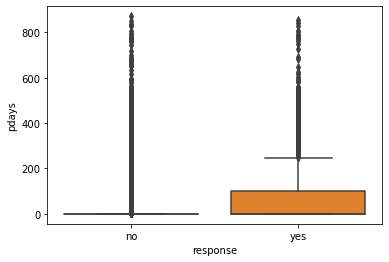

In [34]:
#pdays

sns.boxplot(x='response', y='pdays', data=df)

In [35]:
# Fixing pdays column
min_val = dataset_new["pdays"].min()
max_val = 250
dataset_new = impute_outliers(df=dataset_new, column='pdays' , minimum=min_val, maximum=max_val)

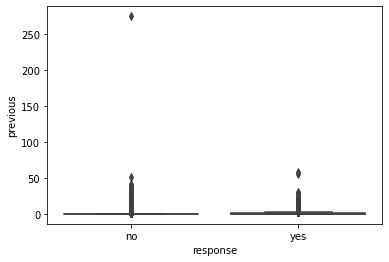

In [36]:
#previous

sns.boxplot(x='response', y='previous', data=df)

In [37]:
# Fixing 'previous' column
min_val = dataset_new["previous"].min()
max_val = 15
dataset_new = impute_outliers(df=dataset_new, column='previous' , minimum=min_val, maximum=max_val)

In [38]:
#lets see statistic of Numerical variables after Outlier treatment
dataset_new.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1239.089967,15.806419,255.154379,2.630474,17.370434,0.520972
std,10.618762,32085.718415,2213.867032,8.322476,242.792228,2.456852,47.938636,1.512395
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1397.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,19985.000000,31.000000,1994.000000,20.000000,250.000000,15.000000


Now the data seems quite stable comparision to original.

### Analysis of Indepedent Categorical Variables
Note:
### 1. If any Categorical variable has more than 50% unknown values or seems highly unbalanced, we can drop that variable from dataset.
### 2. If unknown values are less than 50% than we can replace them by Mode of respective variable by implementing following 'impute_unknowns' function.¶

In [39]:
# Impute unknowns function
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', dataset[column].mode(), col_values)
    return df

job
admin.           11.437482
blue-collar      21.525735
entrepreneur      3.289023
housemaid         2.742695
management       20.919688
retired           5.007631
self-employed     3.492513
services          9.188029
student           2.074716
technician       16.803433
unemployed        2.882042
unknown           0.637013
dtype: float64


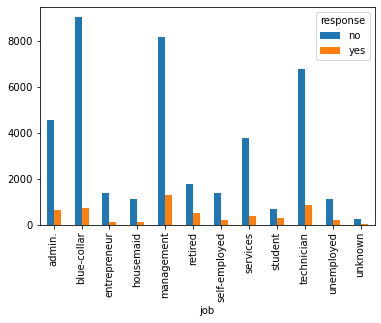

In [42]:
# job
temp1 = pd.crosstab(df['job'], df['response'])
temp1.plot(kind='bar')
print(df.groupby(['job']).size()/len(df)*100)

marital
divorced    11.517109
married     60.193316
single      28.289576
dtype: float64


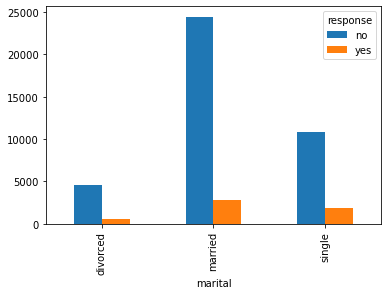

In [46]:
# marital
temp2 = pd.crosstab(df['marital'], df['response'])
temp2.plot(kind='bar')
print(df.groupby(['marital']).size()/len(df)*100)

education
primary      15.153392
secondary    51.319369
tertiary     29.419831
unknown       4.107407
dtype: float64


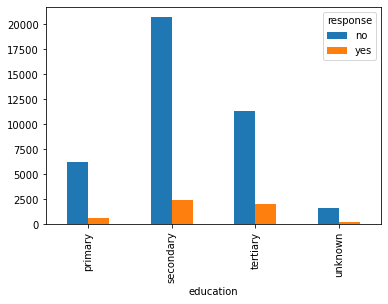

In [47]:
# education
temp3 = pd.crosstab(df['education'], df['response'])
temp3.plot(kind='bar')
print(df.groupby(['education']).size()/len(df)*100)

default
no     98.197341
yes     1.802659
dtype: float64


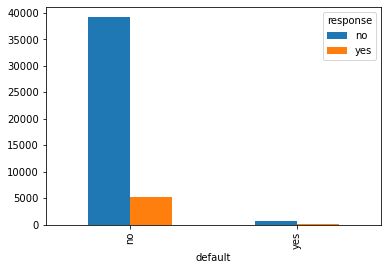

In [49]:
# default
temp4 = pd.crosstab(df['default'], df['response'])
temp4.plot(kind='bar')
print(df.groupby(['default']).size()/len(df)*100)

housing
no     44.416182
yes    55.583818
dtype: float64


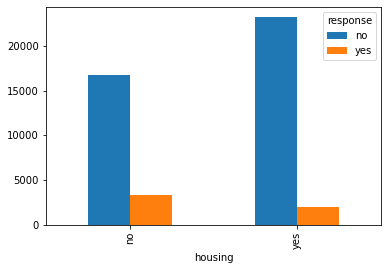

In [50]:
# housing
temp5 = pd.crosstab(df['housing'], df['response'])
temp5.plot(kind='bar')
print(df.groupby(['housing']).size()/len(df)*100)

contact
cellular     64.774059
telephone     6.427639
unknown      28.798301
dtype: float64


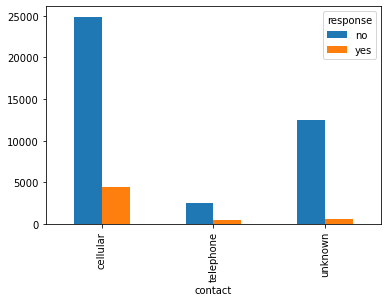

In [52]:
# "contact"
temp6 = pd.crosstab(df['contact'], df['response'])
temp6.plot(kind='bar')
print(df.groupby(['contact']).size()/len(df)*100)

month
apr     6.485147
aug    13.817434
dec     0.473336
feb     5.859194
jan     3.103227
jul    15.250713
jun    11.813497
mar     1.055053
may    30.448342
nov     8.781049
oct     1.632346
sep     1.280662
dtype: float64


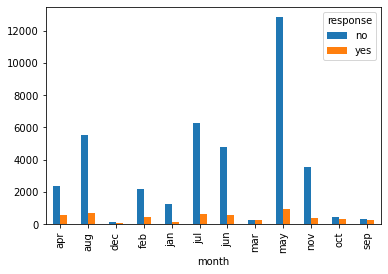

In [53]:
# "month"
temp7 = pd.crosstab(df['month'], df['response'])
temp7.plot(kind='bar')
print(df.groupby(['month']).size()/len(df)*100)

poutcome
failure    10.840282
other       4.069806
success     3.342107
unknown    81.747805
dtype: float64


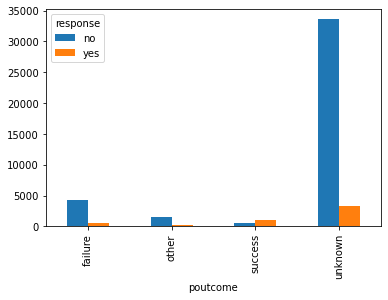

In [55]:
# "poutcome"
temp8 = pd.crosstab(df['poutcome'], df['response'])
temp8.plot(kind='bar')
print(df.groupby(['poutcome']).size()/len(df)*100)

loan
no     83.977351
yes    16.022649
dtype: float64


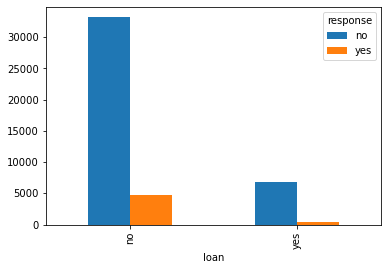

In [56]:
# "loan"
temp9 = pd.crosstab(df['loan'], df['response'])
temp9.plot(kind='bar')
print(df.groupby(['loan']).size()/len(df)*100)

## Updated Dataset after Exploratary Data Analysis:

In [57]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   salary     45211 non-null  int64  
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   targeted   45211 non-null  object 
 6   default    45211 non-null  object 
 7   balance    45211 non-null  float64
 8   housing    45211 non-null  object 
 9   loan       45211 non-null  object 
 10  contact    45211 non-null  object 
 11  day        45211 non-null  int64  
 12  month      45211 non-null  object 
 13  duration   45211 non-null  float64
 14  campaign   45211 non-null  float64
 15  pdays      45211 non-null  float64
 16  previous   45211 non-null  float64
 17  poutcome   45211 non-null  object 
 18  response   45211 non-null  object 
dtypes: float64(5), int64(3), object(11)
memory usa

##  Feature Engineering

In [58]:
#Seperating Target variable from other variables
dataset_Y = dataset_new['response']
dataset_X = dataset_new[dataset_new.columns[0:12]]

In [59]:
#converting Independent Categorical into Numeriacal by creating Dummy variables
dataset_X_dummy = pd.get_dummies(dataset_X)
print(dataset_X_dummy.head())

   age  salary  balance  day  job_admin.  job_blue-collar  job_entrepreneur  \
0   58  100000   2143.0    5           0                0                 0   
1   44   60000     29.0    5           0                0                 0   
2   33  120000      2.0    5           0                0                 1   
3   47   20000   1506.0    5           0                1                 0   
4   33       0      1.0    5           0                0                 0   

   job_housemaid  job_management  job_retired  ...  targeted_yes  default_no  \
0              0               1            0  ...             1           1   
1              0               0            0  ...             1           1   
2              0               0            0  ...             1           1   
3              0               0            0  ...             0           1   
4              0               0            0  ...             0           1   

   default_yes  housing_no  housing_yes  loa

After creating Dummy Variables we have now 39 Variables.

## Feature Selection with PCA

In [60]:
#converting dataframe into numpy Array
X = dataset_X_dummy.values
Y = dataset_Y.values

# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [66]:
#Scaling the values
X_t = scale(X_train)

#initially lets create 39 components which is actual number of Variables we have
pca = PCA(n_components=34)

pca.fit(X_t)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

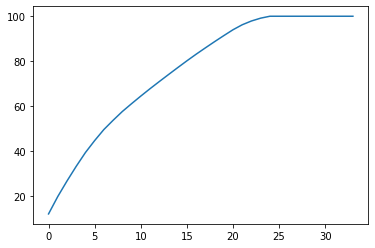

In [67]:
#lets see Cumulative Variance plot
plt.plot(var1)

**From Cumulative Variance plot we can find that first 32 components are explaining nearly 100% variability of actual data.**
**So we will proceed with only 32 components for further modelling**

In [68]:
#Looking at above plot I'm taking 32 variables
pca = PCA(n_components=32)
pca.fit(X_t)
X_train_PC=pca.fit_transform(X_t)

# Model Training

In [69]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [74]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RFA', RandomForestRegressor()))

In [75]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_PC, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR: 0.881746 (0.005083)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 333, in fit
    y = np.ascontiguousarray(y, dtype=DOUBLE)
  File "D:\Anaconda\lib\site-packages\numpy\core\_asarray.py", line 179, in ascontiguousarray
    return array(a, dtype, copy=False, order='C', ndmin=1)
ValueError: could not convert string to float: 'no

RFA: nan (nan)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 333, in fit
    y = np.ascontiguousarray(y, dtype=DOUBLE)
  File "D:\Anaconda\lib\site-packages\numpy\core\_asarray.py", line 179, in ascontiguousarray
    return array(a, dtype, copy=False, order='C', ndmin=1)
ValueError: could not convert string to float: 'no'

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Deta

## Model Selection

D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


[Text(0, 0, 'LR'), Text(0, 0, 'RFA')]

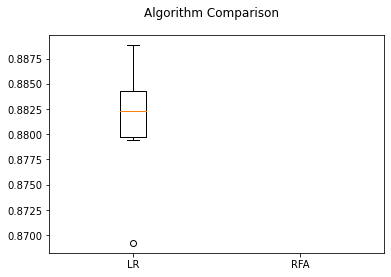

In [76]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

## Making Prediction

In [77]:
#Scaling the X_validation data
X_v = scale(X_validation)

pca.fit(X_v)
X_validation_PC=pca.fit_transform(X_v)

In [80]:
# Make predictions on validation dataset by choosing best Algorithm
lr = LogisticRegression()
lr.fit(X_train_PC, Y_train)
predictions = lr.predict(X_validation_PC)
print("Accuracy : ", accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy :  0.8876479044564857
[[8027    0]
 [1016    0]]
              precision    recall  f1-score   support

          no       0.89      1.00      0.94      8027
         yes       0.00      0.00      0.00      1016

    accuracy                           0.89      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.79      0.89      0.83      9043



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
